In [26]:
# revenue = pd.DataFrame([
#     ["fare_revenue", 11084076, 12032459, 12280594, 12900033, 13318991,
#      13265242, 13109257, 13161534, 14366360, 13905945],
#     ["local_share", 13379014, 14446953, 15410587, 18421877, 19981088,
#      17375936, 15096109, 20548706, 17380203, 18540693],
#     ["state_funds", 17505072, 18021300, 16599975, 16600000, 16677514,
#      17375936, 17370419, 17414239, 17357996, 17352591],
#     ["federal_assistance", 6902527, 5985721, 5988679, 6023421, 6338075,
#      6513440, 6172130, 6295936, 6294361, 6187400],
#     ["other_funds", 612495, 580125, 643843, 722411, 493544,
#      529816, 693377, 951683, 1047819, 1245306]
# ], columns=["categories", "2010", "2011", "2012", "2013", "2014",
#             "2015", "2016", "2017", "2018", "2019"])
#
#
# expense = pd.DataFrame([
#     ["salaries_wages_benefits", 36554849, 37008463, 36338977, 37678785, 38852886,
#      39948738, 42430006, 43584469, 42880871, 41942742],
#     ["materials_supplies", 4475605, 5528433, 5708273, 5667697, 6506463,
#      6410547, 6503633, 5430356, 4471356, 4990000],
#     ["purchased_transportation", 4277587, 4254722, 4307438, 4462664, 4598846,
#      4685519, 4688858, 4931813, 3286906, 3401145],
#     ["other_operating_expenses", 2182410, 1979569, 1838241, 2137982, 2050379,
#      2193730, 3264249, 4533569, 3944876, 4478786],
# ], columns=["categories", "2010", "2011", "2012", "2013", "2014",
#             "2015", "2016", "2017", "2018", "2019"])
#
# revenue.to_csv("../../../../data/FTA/revenue.csv", index=False)
# expense.to_csv("../../../../data/FTA/expense.csv", index=False)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 16
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
# Vehicle Revenue Miles
# - Actual vehicle miles include:
#   • Revenue service
#   • Deadhead
# - Actual vehicle miles exclude:
#   • Miles for charter service
#   • School bus service
#   • Operator training
#   • Vehicle maintenance testing
master = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="MASTER")
madison = pd.read_csv("../../../../data/FTA/madison_data.csv")
vrm = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="VRM")
vrh = pd.read_excel("../../../../data/FTA/August_2020_Raw_Database.xlsx", sheet_name="VRH")
vrm.head()

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,NOV19,DEC19,JAN20,FEB20,MAR20,APR20,MAY20,JUN20,JUL20,AUG20
0,1.00000,1,King County Department of Metro Transit,Active,Full Reporter,14.00000,"Seattle, WA",DR,PT,746158.00000,...,691308.00000,678059.00000,694313.00000,678459.00000,379531.00000,186561.00000,208021.00000,236946.00000,343613.00000,311980.00000
1,1.00000,1,King County Department of Metro Transit,Active,Full Reporter,14.00000,"Seattle, WA",DR,TX,nan,...,181398.00000,171530.00000,193981.00000,200871.00000,52019.00000,22594.00000,42319.00000,80220.00000,76898.00000,nan
2,1.00000,1,King County Department of Metro Transit,Active,Full Reporter,14.00000,"Seattle, WA",FB,DO,nan,...,2924.00000,3528.00000,3528.00000,3192.00000,3696.00000,1568.00000,1120.00000,2016.00000,3696.00000,nan
3,1.00000,1,King County Department of Metro Transit,Active,Full Reporter,14.00000,"Seattle, WA",LR,DO,2655.00000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1.00000,1,King County Department of Metro Transit,Active,Full Reporter,14.00000,"Seattle, WA",MB,DO,2878549.00000,...,2705588.00000,2779108.00000,3040366.00000,2854629.00000,2920744.00000,2222759.00000,2136250.00000,2334010.00000,2606426.00000,2591214.00000


In [27]:
master[(master["HQ State"] == "WI") & (master["Mode"] == "MB")].loc[1066]

5 digit NTD ID                           50005
4 digit NTD ID                            5005
Agency                         City of Madison
Mode                                        MB
TOS                                         DO
Active                                  Active
Reporter Type                    Full Reporter
HQ City                                Madison
HQ State                                    WI
UZA                                         92
UZA Name                           Madison, WI
UZA Area SQ Miles                       151.00
UZA Population                       401661.00
Service Area SQ Miles                    71.00
Service Area Population              249056.00
Most Recent Report Year                2019.00
FY End Month                             12.00
FY End Year                            2019.00
Passenger Miles FY                 50762500.00
Unlinked Passenger Trips FY        12856514.00
Average Trip Length FY                    3.95
Fares FY     

In [28]:
# analysis on only motorbus (MB) and directly operated (DO) service
vrm[vrm["UZA Name"].str.contains("WI") & (vrm["Modes"] == "MB") & (vrm["TOS"] == "DO")]

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,NOV19,DEC19,JAN20,FEB20,MAR20,APR20,MAY20,JUN20,JUL20,AUG20
1052,50001.00,5001,City of Appleton,Active,Full Reporter,165.00,"Appleton, WI",MB,DO,76142.00,...,72592.00,73237.00,76640.00,72702.00,76372.00,75439.00,74630.00,77903.00,76034.00,74938.00
1055,50002.00,5002,City of Green Bay,Active,Full Reporter,176.00,"Green Bay, WI",MB,DO,nan,...,97380.00,94754.00,101668.00,94658.00,59185.00,43496.00,50352.00,57829.00,59313.00,53010.00
1058,50003.00,5003,City of Kenosha,Active,Full Reporter,256.00,"Kenosha, WI-IL",MB,DO,89923.00,...,82097.00,83057.00,88226.00,83287.00,81277.00,67330.00,61738.00,64911.00,68967.00,54345.00
1061,50004.00,5004,City of La Crosse,Active,Full Reporter,298.00,"La Crosse, WI-MN",MB,DO,63371.00,...,69568.00,67852.00,73594.00,72121.00,68001.00,46773.00,49082.00,74356.00,76526.00,74488.00
1066,50005.00,5005,City of Madison,Active,Full Reporter,92.00,"Madison, WI",MB,DO,390925.00,...,413234.00,418855.00,430302.00,486731.00,435183.00,251850.00,nan,nan,nan,nan
1070,50006.00,5006,"City of Racine, Wisconsin",Active,Full Reporter,239.00,"Racine, WI",MB,DO,111994.00,...,75773.00,78194.00,79790.00,74781.00,78989.00,76654.00,72637.00,78363.00,78291.00,75685.00
1074,50008.00,5008,Milwaukee County,Active,Full Reporter,35.00,"Milwaukee, WI",MB,DO,1601795.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1079,50009.00,5009,"City of Oshkosh, Wisconsin",Active,Full Reporter,376.00,"Oshkosh, WI",MB,DO,38335.00,...,38338.00,37708.00,38785.00,38039.00,39785.00,39533.00,37798.00,39575.00,39948.00,39674.00
1120,50025.00,5025,Duluth Transit Authority,Active,Full Reporter,260.00,"Duluth, MN-WI",MB,DO,nan,...,156488.00,157562.00,164877.00,158576.00,161709.00,89884.00,95784.00,143934.00,159217.00,164489.00
1125,50027.00,5027,Metro Transit,Active,Full Reporter,16.00,"Minneapolis-St. Paul, MN-WI",MB,DO,2153338.00,...,1926093.00,1983918.00,2053151.00,1915623.00,1903872.00,1379778.00,1390432.00,1424095.00,1548349.00,1522697.00


In [149]:
# percentage of covered area (
upts = madison[["date", "upt_madison", "upt_wisc_state", "upt_us"]]
vrms = madison[["date", "vrm_madison", "vrm_wisc_state", "vrm_us"]]
vrhs = madison[["date", "vrh_madison", "vrh_wisc_state", "vrh_us"]]
voms = madison[["date", "voms_madison", "voms_wisc_state", "voms_us"]]

madisons = madison[["date", "upt_madison", "vrm_madison", "vrh_madison", "voms_madison"]]
revenue = pd.read_csv("../../../../data/FTA/revenue.csv").T
expense = pd.read_csv("../../../../data/FTA/expense.csv").T
# transpose and rename columns
revenue.rename(columns=revenue.iloc[0], inplace=True)
revenue.drop(revenue.index[0], inplace=True)
# transpose and rename columns
expense.rename(columns=expense.iloc[0], inplace=True)
expense.drop(expense.index[0], inplace=True)
# vrm / annual net income / annual expense


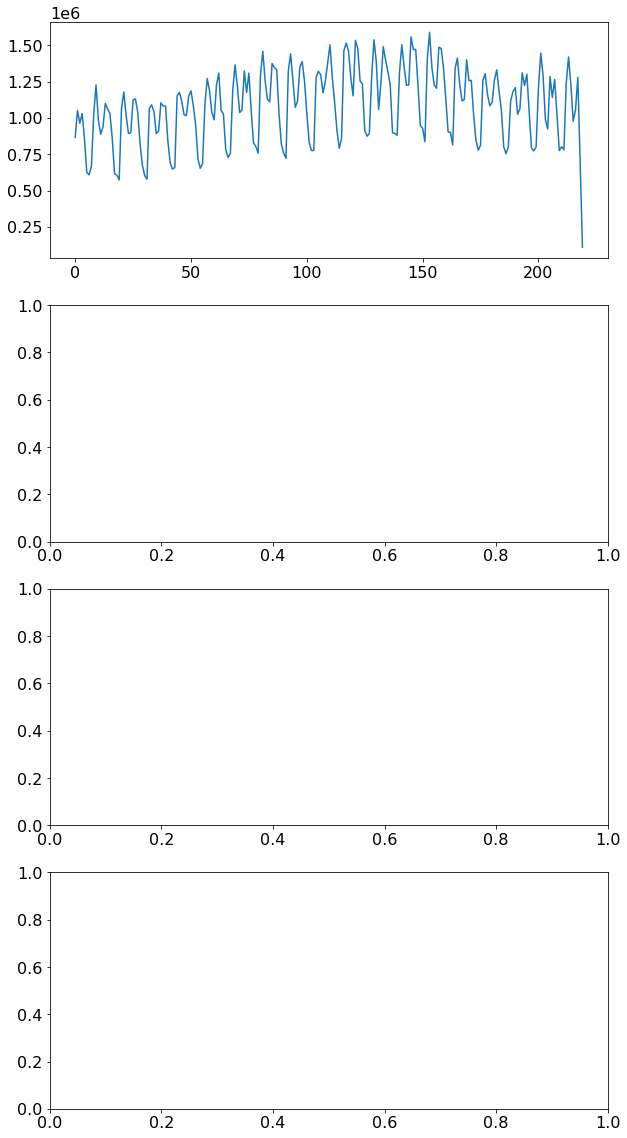

In [106]:
# ax1.plot(revenue.iloc[0, 1:])
# ax1.plot(revenue.iloc[1, 1:])
# ax1.plot(revenue.iloc[2, 1:])
# ax1.plot(revenue.iloc[3, 1:])
# ax1.plot(revenue.iloc[4, 1:])
# ax1.text(revenue.columns[-1], revenue.iloc[0, -1], revenue.iloc[0, 0], va="center", ha="left")
# ax1.text(revenue.columns[-1], revenue.iloc[1, -1], revenue.iloc[1, 0], va="center", ha="left")
# ax1.text(revenue.columns[-1], revenue.iloc[2, -1], revenue.iloc[2, 0], va="center", ha="left")
# ax1.text(revenue.columns[-1], revenue.iloc[3, -1], revenue.iloc[3, 0], va="center", ha="left")
# ax1.text(revenue.columns[-1], revenue.iloc[4, -1], revenue.iloc[4, 0], va="center", ha="left")
#
# ax1.set_ylim(0, 2e7+4e6)
# ax1.set_yticks(np.arange(0, 24, 4) * 1e6)
# ax1.set_yticklabels(list(map(str, np.arange(0, 24, 4))))
# ax1.set_ylabel("Revenue (in 100,000)")

fig, axes = plt.subplots(nrows=4, figsize=(10, 20))

# -------------------------------- a1 --------------------------------
ax1 = axes[0]




ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

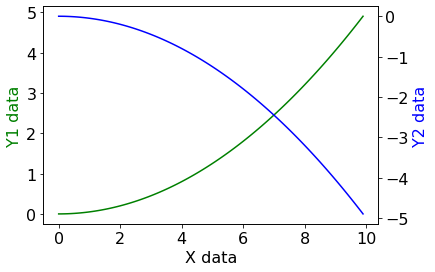

In [43]:

x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()